# SHIVAM, M22AI632

## PROBLEM 2 - Learning to implement Neural Network

In [1]:
#!pip install tensorflow

In [2]:
#pip install opencv-python

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2 
from keras.layers import Dense, Flatten

In [4]:
# Define the paths to your image folders
train_path = 'C://Users//shiva//Downloads//Question2//train'
val_path = 'C://Users//shiva//Downloads//Question2//val'
 

In [5]:
# Setting the path to the folder containing the 'train' folder
data_dir = train_path


# Setting the image size in the code beow
img_size = (32, 32)

# Create empty lists for the images and labels
images = []
labels = []

# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir, str(label))
    # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)
            # Append the image and label to the lists
            images.append(img)
            labels.append(label)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)

In [6]:
# Set the path to the folder containing the 'val' folder
data_dir_val = val_path

# Set the image size
img_size_val = (32, 32)

# Create empty lists for the images and labels
images_val = []
labels_val = []

# Loop over each folder from '0' to '9'
for label in range(10): 
    folder_path = os.path.join(data_dir_val, str(label))
   
    # Loop over each image in the folder
    for file in os.listdir(folder_path):            
        file_path = os.path.join(folder_path, file) 
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size_val)
            # Append the image and label to the lists
            images_val.append(img)
            labels_val.append(label)

# Convert the lists to NumPy arrays
images_val = np.array(images_val)
labels_val = np.array(labels_val)

# Save the arrays in NumPy format
np.save('x_test.npy', images_val)
np.save('y_test.npy', labels_val)
 

In [7]:
# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

1000
178
(1000, 32, 32)
(178, 32, 32)


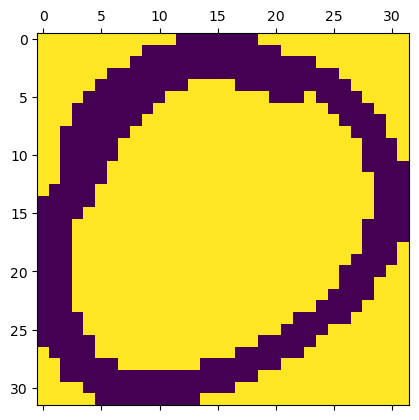

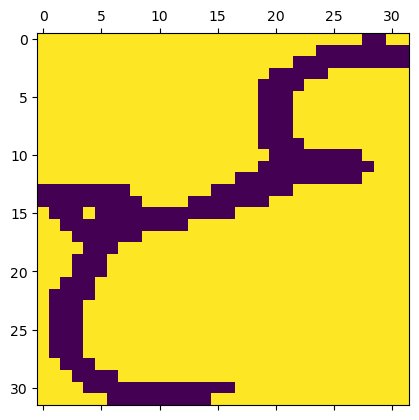

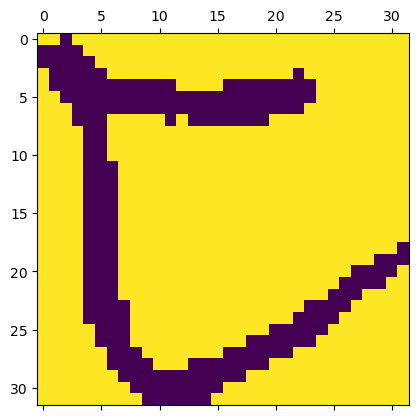

In [8]:
# test the images are loaded correctly

print(len(x_train))
print(len(x_test))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
plt.matshow(x_train[999])
print(x_train.shape)
print(x_test.shape)
y_train
y_test
plt.matshow(x_test[150])

In [9]:
# creating a simple nn
# create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid

model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')    
])

# compile the nn
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
# train the model
# some 10 iterations done here
model.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test)) 

Epoch 1/10
32/32 [==============================] - 1s 15ms/step - loss: 115.5559 - accuracy: 0.4530 - val_loss: 46.8270 - val_accuracy: 0.6854
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 26.5951 - accuracy: 0.8070 - val_loss: 74.8062 - val_accuracy: 0.5899
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 19.2658 - accuracy: 0.8330 - val_loss: 16.6158 - val_accuracy: 0.8427
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 8.0406 - accuracy: 0.9150 - val_loss: 20.5731 - val_accuracy: 0.8090
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 6.0896 - accuracy: 0.9280 - val_loss: 17.2692 - val_accuracy: 0.8090
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 9.0432 - accuracy: 0.9080 - val_loss: 8.9487 - val_accuracy: 0.8764
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 6.5816 - accuracy: 0.9300 - val_loss: 30.1559 - val_accuracy: 0.7921
Epoch 8/1

In [10]:
# Observation : we see a better accuracy from the 2nd iteration

In [11]:
#  now scale and try to check the accuracy, divide dataset by 255 
 
x_train_scaled = x_train/255
x_test_scaled = x_test/255

model.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 1s 13ms/step - loss: 0.9022 - accuracy: 0.7410 - val_loss: 1.2925 - val_accuracy: 0.4888
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 0.9227 - accuracy: 0.7240 - val_loss: 1.1306 - val_accuracy: 0.6348
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.8049 - accuracy: 0.8350 - val_loss: 1.0185 - val_accuracy: 0.7697
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7300 - accuracy: 0.8990 - val_loss: 0.9503 - val_accuracy: 0.8371
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6831 - accuracy: 0.9350 - val_loss: 0.9074 - val_accuracy: 0.8539
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.9600 - val_loss: 0.8752 - val_accuracy: 0.8708
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6284 - accuracy: 0.9790 - val_loss: 0.8529 - val_accuracy: 0.8933
Epoch 8/10
32/32 [=

In [12]:
# Observation : we got better result for all iterations on scaling the training dataset

In [13]:
# evaluate test dataset

model.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.8146 - accuracy: 0.8933


[0.8146309852600098, 0.8932584524154663]

In [14]:
# Observation : result almost same as the training dataset, 

6/6 [==============================] - 0s 2ms/step
[0.9465528  0.64557713 0.80369866 0.32724857 0.5616682  0.7748205
 0.565585   0.7348305  0.76807946 0.6987233 ]
Predicted Value is  0
Predicted Value is  5
Predicted Value is  9


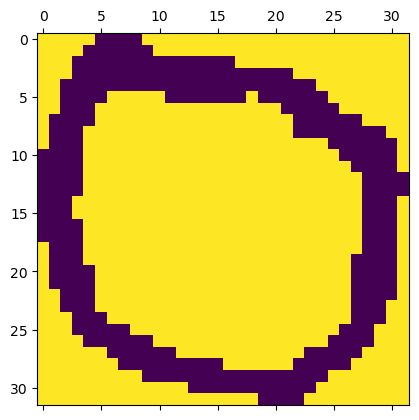

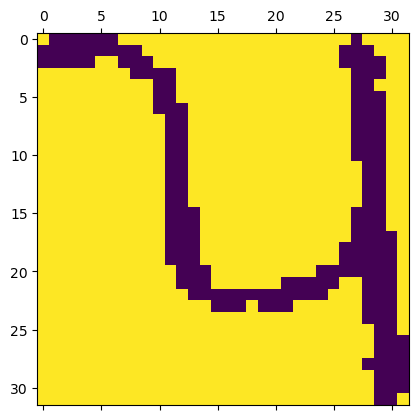

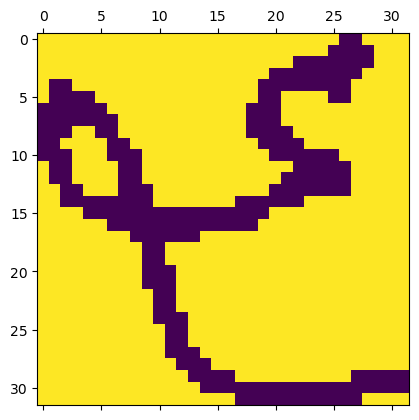

In [15]:
# predict 1st image 

plt.matshow(x_test[0])

y_predicted = model.predict(x_test_scaled)
print(y_predicted[0])

# this showing the 10 results for the input '0', we need to look for the value which is max

print('Predicted Value is ',np.argmax(y_predicted[0]))

# test some more values 

plt.matshow(x_test[88])
print('Predicted Value is ',np.argmax(y_predicted[88]))

plt.matshow(x_test[177])
print('Predicted Value is ',np.argmax(y_predicted[177]))

In [16]:
# some predictions may not be not right

# build confusion matrix to see how our prediction looks like

# convert to concrete values
y_predicted_labels=[np.argmax(i) for i in y_predicted]

print(y_predicted_labels, len(y_predicted_labels))

conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 8, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 4, 2, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[15,  0,  1,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  9,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 0,  0, 14,  0,  1,  1,  0,  0,  0,  1],
       [ 0,  0,  0, 16,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 16,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

Text(95.72222222222221, 0.5, 'Actual')

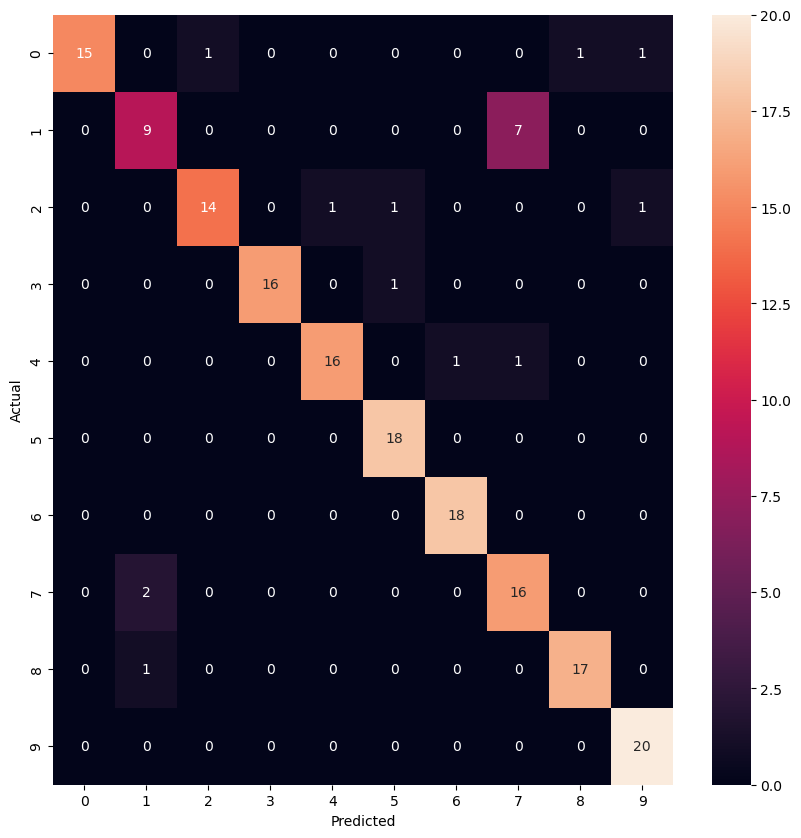

In [17]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [18]:
# here we can see there are some errors 
# we need to modify our nn, we add some layers in the above model and different activation function

In [19]:
# in 1st Dense layer,the input is 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9)
# 2nd Dense layer,the input is 10 neurons from above layers output
# we can add more layers for accuracy

model2 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# compile the nn
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
# train the model
# some 10 iterations done here
history = model2.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test)) 

Epoch 1/10
32/32 [==============================] - 2s 31ms/step - loss: 0.8450 - accuracy: 0.7780 - val_loss: 0.3716 - val_accuracy: 0.8708
Epoch 2/10
32/32 [==============================] - 1s 23ms/step - loss: 0.1540 - accuracy: 0.9420 - val_loss: 0.2271 - val_accuracy: 0.9270
Epoch 3/10
32/32 [==============================] - 1s 26ms/step - loss: 0.1174 - accuracy: 0.9630 - val_loss: 0.3480 - val_accuracy: 0.8876
Epoch 4/10
32/32 [==============================] - 1s 25ms/step - loss: 0.0714 - accuracy: 0.9810 - val_loss: 0.2632 - val_accuracy: 0.9326
Epoch 5/10
32/32 [==============================] - 1s 22ms/step - loss: 0.0438 - accuracy: 0.9890 - val_loss: 0.2325 - val_accuracy: 0.9382
Epoch 6/10
32/32 [==============================] - 1s 25ms/step - loss: 0.0430 - accuracy: 0.9860 - val_loss: 0.2551 - val_accuracy: 0.9326
Epoch 7/10
32/32 [==============================] - 1s 24ms/step - loss: 0.0286 - accuracy: 0.9930 - val_loss: 0.2209 - val_accuracy: 0.9382
Epoch 8/10
32

In [20]:
# Observation : due to multiple layers the compiling will take more time to execute
# we also got amazing accuracy than earlier

# evaluate test dataset on modified model

model2.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 7ms/step - loss: 0.2474 - accuracy: 0.9438


[0.2474176585674286, 0.9438202381134033]

In [21]:
# Earlier we got  0.9213483333587646 now we got 0.9606741666793823 accuracy

# redo the confusion matrix 

# build confusion matrix to see how our prediction looks like

# convert to concrete values

y_predicted = model2.predict(x_test_scaled)
y_predicted[0]

y_predicted_labels=[np.argmax(i) for i in y_predicted]

print(y_predicted_labels, len(y_predicted_labels))

conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

6/6 [==============================] - 0s 7ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 13,  2,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

Text(95.72222222222221, 0.5, 'Actual')

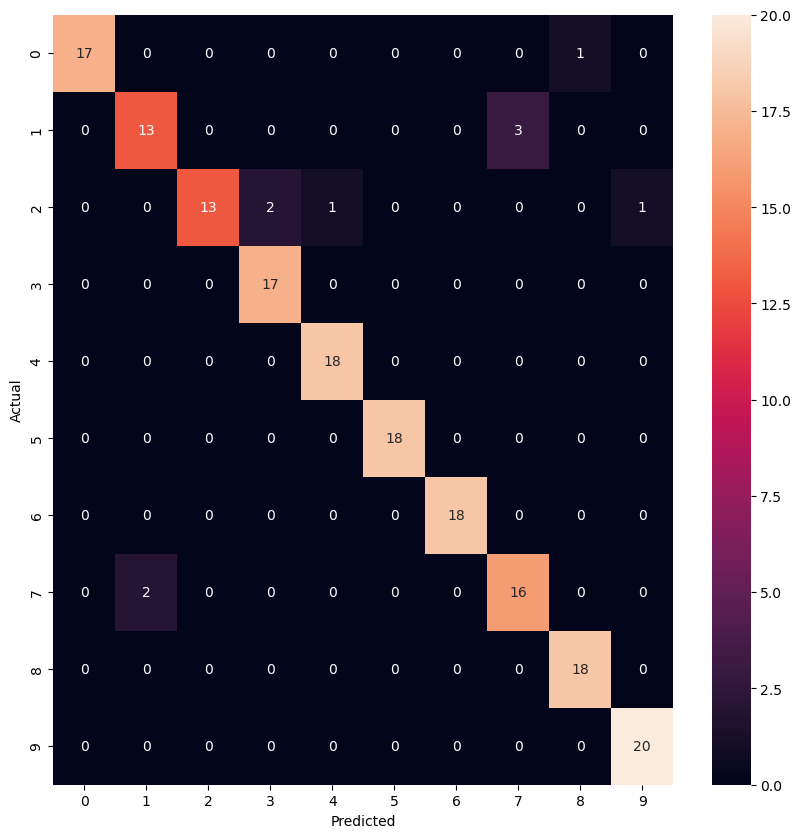

In [22]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [23]:
# Following is the Observatoin : we see in the updated model, there are less number of errors, 
# the non-diagonals ones are error

6/6 [==============================] - 0s 4ms/step - loss: 11.9171 - accuracy: 0.9045
Test accuracy: 0.9044944047927856


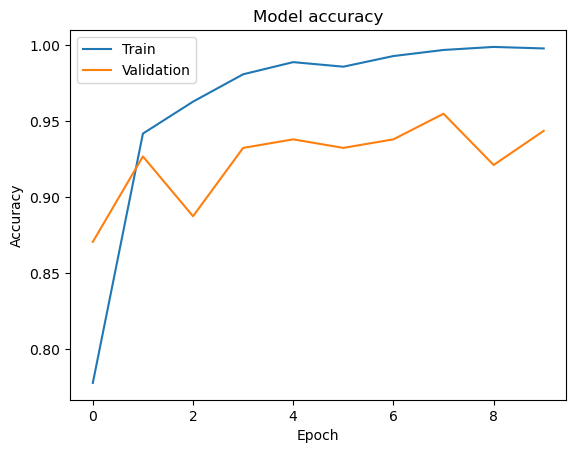

In [24]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()